In [1]:
! nvidia-smi

Fri Jun  3 09:29:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 創建資料夾

In [2]:
import os
import shutil 
from google.colab import drive
#drive.mount('/content/drive')

# 下載 Darknet

In [3]:
! git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [4]:
%cd darknet
! sed -i "s/GPU=0/GPU=1/g" Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
! sed -i "s/CUDNN_HALF=0/CUDNN_HALF=1/g" Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" Makefile

/content/darknet


In [5]:
! make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

# 下載 Yolo-Fastest

In [6]:
% cd ../
! git clone https://github.com/dog-qiuqiu/Yolo-Fastest

/content
fatal: destination path 'Yolo-Fastest' already exists and is not an empty directory.


In [7]:
% cd Yolo-Fastest

/content/Yolo-Fastest


In [8]:
!cp ./ModelZoo/yolo-fastest-1.1_coco/yolo-fastest-1.1.cfg ../darknet/cfg/yolo-fastest.cfg
!cp ./ModelZoo/yolo-fastest-1.1_coco/yolo-fastest-1.1.weights ../darknet/cfg/yolo-fastest.weights

In [9]:
! sed -n -e 4p -e 5p -e 6p -e 834p -e 841p -e 910p -e 917p ../darknet/cfg/yolo-fastest.cfg

width=320
height=320
channels=3
activation=linear
pad=1
pad=1
stride=1


In [10]:
%cd ../darknet

/content/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv      8       3 x 3/ 2    320 x 320 x   3 ->  160 x 160 x   8 0.011 BF
   1 conv      8       1 x 1/ 1    160 x 160 x   8 ->  160 x 160 x   8 0.003 BF
   2 conv      8/   8  3 x 3/ 1    160 x 160 x   8 ->  160 x 160 x   8 0.004 BF
   3 conv      4       1 x 1/ 1    160 x 160 x   8 ->  160 x 160 x   4 0.002 BF
   4 conv      8       1 x 1/ 1    160 x 160 x   4 ->  160 x 160 x   8 0.002 BF
   5 conv      8/   8  3 x 3/ 1    160 x 160 x   8 ->  160 x 160 x   8 0.004 BF
   6 conv      4       1 x 1/ 1    160 x 160 x   8 ->  160 x 160 x   4 0.002 BF
   7 dropout    p = 0.150        102400  ->   102400
   8 Shortcut Laye

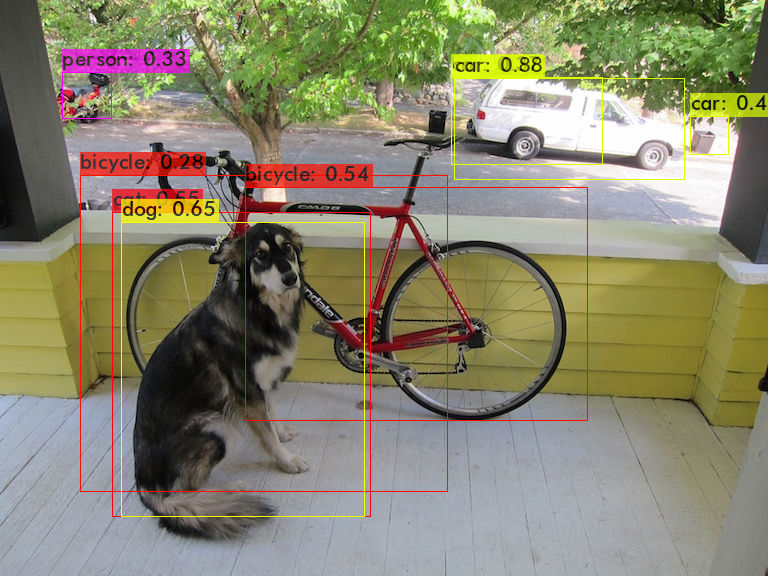

In [11]:
!./darknet detector test cfg/coco.data ./cfg/yolo-fastest.cfg ./cfg/yolo-fastest.weights  data/dog.jpg

import cv2 # 導入OpenCV函式庫
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫

imgResult = cv2.imread('predictions.jpg') # 讀入結果影像
cv2_imshow(imgResult) # 顯示結果影像